In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, DecisionTreeRegressor


In [9]:
# Read in the data
df = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/final167.csv')

In [10]:

# Identify the features and target

X = df.drop('outcome', axis=1)
y = df['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Create the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_train)

# Evaluate the model
score = accuracy_score(y_train, y_preds)
print(f'Accuracy: {score * 100:.2f}%')


Accuracy: 99.90%


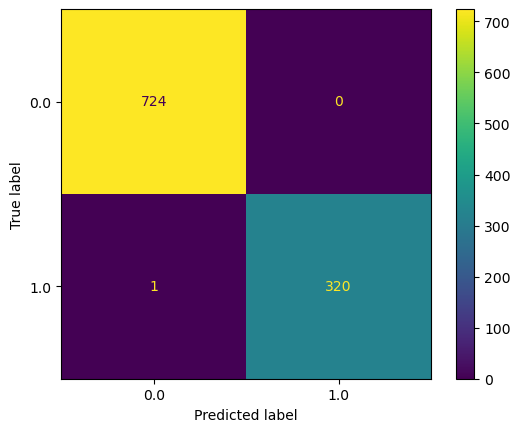

In [11]:
# create confusion matrix with confusionmatrix display object
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot();

In [12]:
# show precision and f1 scores
from sklearn.metrics import classification_report

report = classification_report(y_train, y_preds)
print(report)



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       724
         1.0       1.00      1.00      1.00       321

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



## Initiate Global Surrogate Model

In [13]:
predictions = model.predict(X_train)
dt = DecisionTreeRegressor(random_state = 100, max_depth=3)
# We fit the shallow tree to the matrix X and the predictions of the random forest model 
dt.fit(X_train, predictions)

DecisionTreeRegressor(max_depth=3, random_state=100)

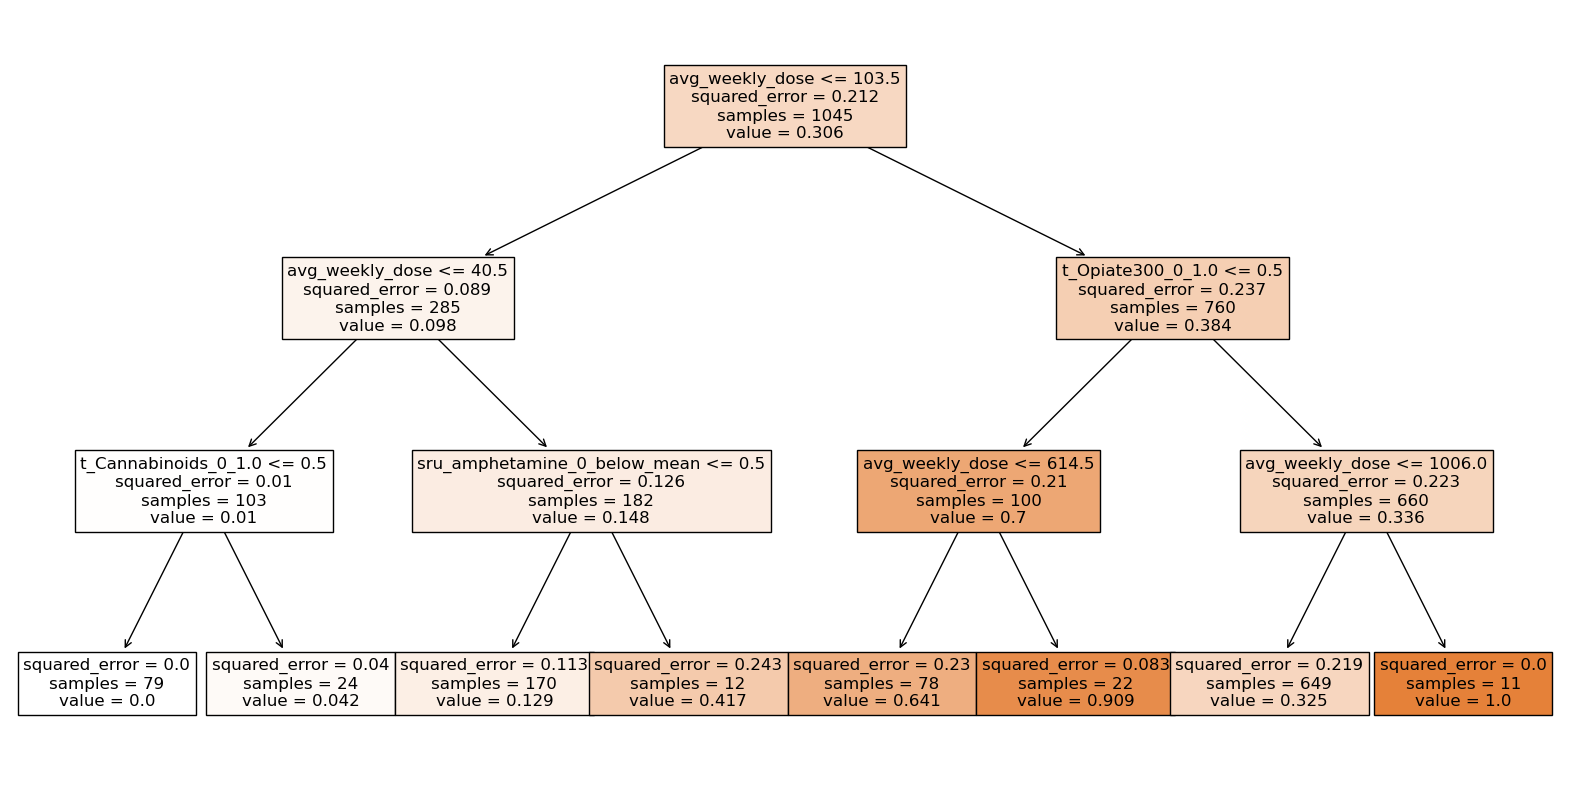

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt, feature_names=list(X.columns), precision=3, 
           filled=True, fontsize=12, impurity=True);